# 1. Project Overview


## Goal:
* Identify key factors that influence student performance in math, reading, and writing.

## Dataset:
* Student Performance dataset (1,000 records, 8 columns)
* Variables: gender, parental education, lunch type, test preparation, math, reading, writing scores.

## Tools:
* Python (Pandas, NumPy)
* Visualization (Matplotlib, Seaborn)
* Jupyter Notebook


# 2. Import Libraries & Load Dataset

In [1]:
# Import Libraries 
import pandas as pd 
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sadiajavedd/students-academic-performance-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/josemosse/.cache/kagglehub/datasets/sadiajavedd/students-academic-performance-dataset/versions/1


In [3]:
# Getting all csv files from kaggle folder
files = glob.glob(r'/Users/josemosse/.cache/kagglehub/datasets/sadiajavedd/students-academic-performance-dataset/versions/1/*.csv')

In [4]:
# Reading and Combining the files
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)

In [5]:
# Saving the Combine files  
df.to_csv('Students_Academic_Performance', index=False)

## Basic Data info

In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
df.shape

(1000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

# 3. Descriptive Statistics
### Insight
* The dataset is clean, with no missing values and all numeric and categorical features properly formatted.

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [13]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [14]:
# Checking for duplicated values
df.duplicated().sum()
print(df.duplicated().sum())

0


In [15]:
# Checking for blank/missing values 
df.isna().mean().sort_values(ascending=False)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [16]:
# Renaming some Columns 
df = df.rename(columns={"race/ethnicity": "ethnicity"})
df = df.rename(columns={"parental level of education": "parent_education_level"})
df = df.rename(columns={"test preparation course": "preparation_course", "math score": "math_score", \
                        "reading score": "reading_score", "writing score": "writing_score"})

In [18]:
# Double checking empty rows
print(f'gender: {df.gender.isnull().sum()}')
print(f'ethnicity: {df.ethnicity.isnull().sum()}')
print(f'parent_education_level: {df.parent_education_level.isnull().sum()}')
print(f'lunch: {df.lunch.isnull().sum()}')
print(f'preparation_course: {df.preparation_course.isnull().sum()}')
print(f'math_score: {df.math_score.isnull().sum()}')
print(f'reading_score: {df.reading_score.isnull().sum()}')
print(f'writing_score: {df.writing_score.isnull().sum()}')

gender: 0
ethnicity: 0
parent_education_level: 0
lunch: 0
preparation_course: 0
math_score: 0
reading_score: 0
writing_score: 0


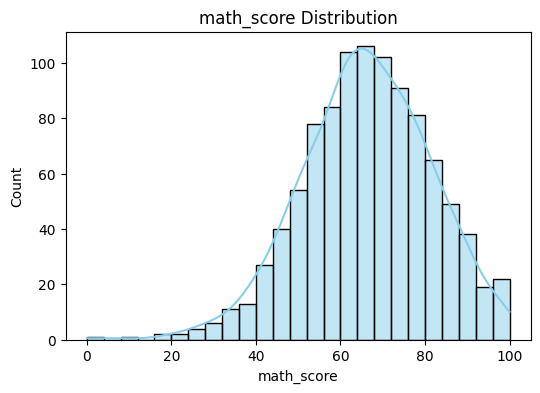

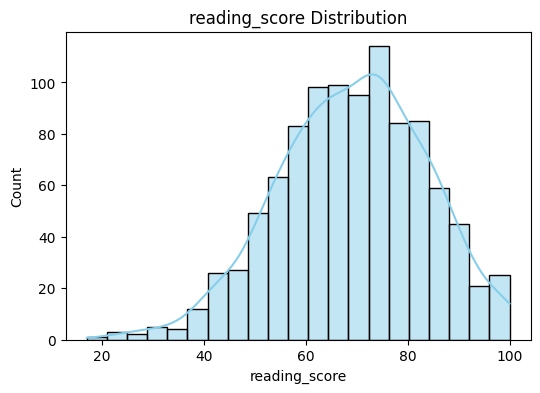

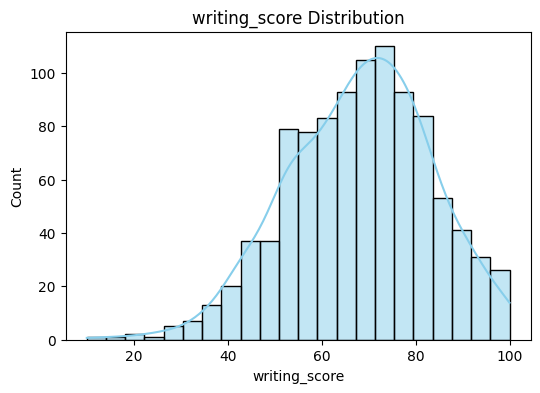

In [17]:
# Distribution plots for each score
score_cols = ['math_score', 'reading_score', 'writing_score']
for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.show()

On average, students perform similarly across subjects, with reading and writing scores slightly higher than math.

# 4. Univariate Analysis

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/3171544320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


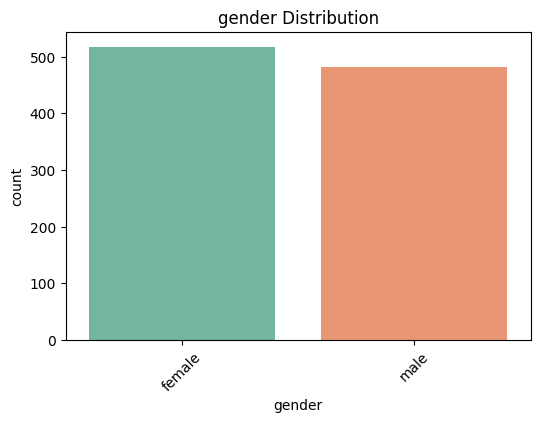

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/3171544320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


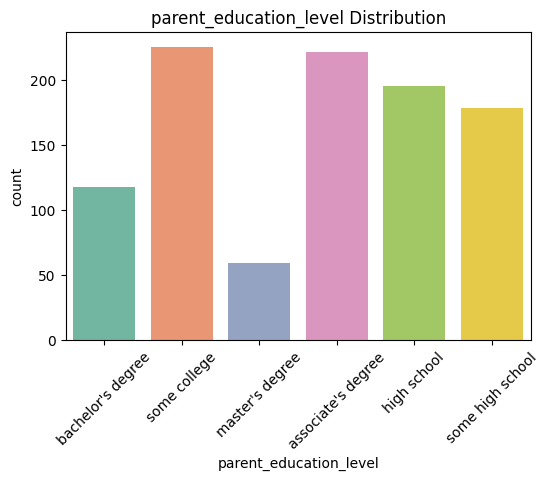

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/3171544320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


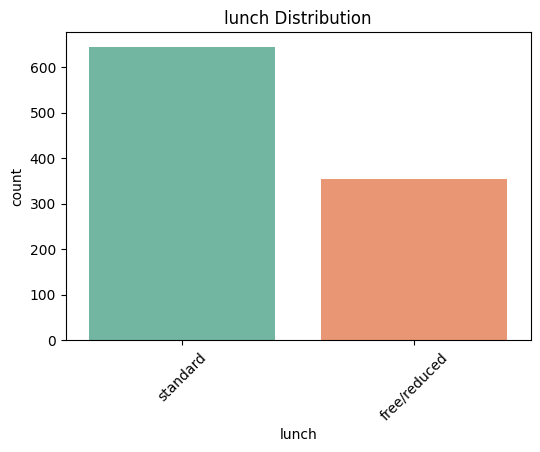

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/3171544320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')


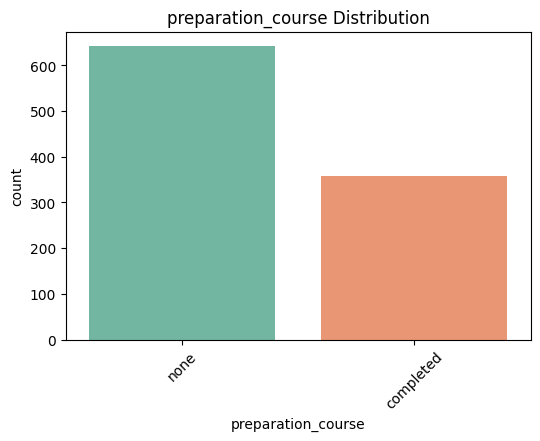

In [19]:
# Categorical distributions
cat_cols = ['gender', 'parent_education_level', 'lunch', 'preparation_course']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

Most students’ parents have completed some college or associate degree. Gender distribution is balanced.

# 5. Bivariate Analysis

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/3774640976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='coolwarm')


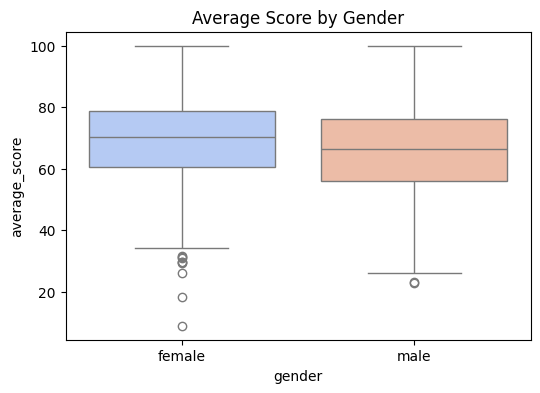

In [22]:
# Gender vs average scores
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='average_score', data=df, palette='coolwarm')
plt.title('Average Score by Gender')
plt.show()

math_score: 8 outliers
reading_score: 6 outliers
writing_score: 5 outliers
average_score: 6 outliers


<function matplotlib.pyplot.show(close=None, block=None)>

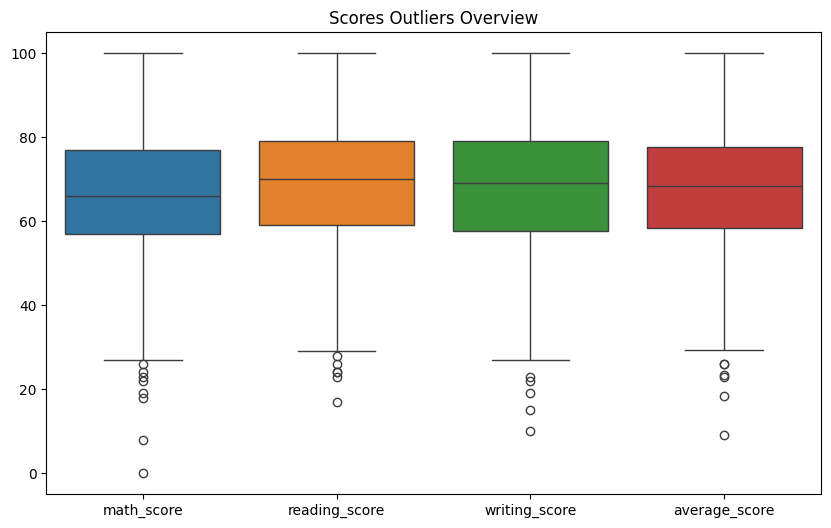

In [24]:
# Outliers
numeric_cols = df.select_dtypes(include="number").columns
outlier_counts = {}
for cols in numeric_cols:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    column_outliers = df[(df[cols] < lower) | (df[cols] > upper)]
    outlier_counts[cols] = len(column_outliers)
    print(f'{cols}: {len(column_outliers)} outliers')

# Visualizing outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Scores Outliers Overview")
plt.show

/var/folders/v4/zn4zqr5n3v933txy2dt3rv700000gp/T/ipykernel_14576/628562231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='preparation_course', y='writing_score', data=df, palette='crest')


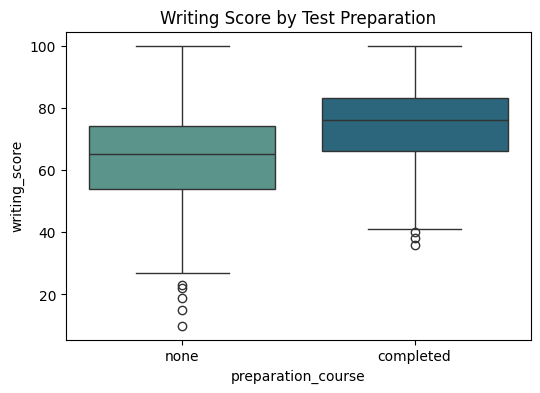

In [26]:
# Test preparation vs writing score
plt.figure(figsize=(6,4))
sns.boxplot(x='preparation_course', y='writing_score', data=df, palette='crest')
plt.title('Writing Score by Test Preparation')
plt.show()


Students who completed a test preparation course scored about 10 points higher in writing and reading on average.

# 6. Correlation Analysis

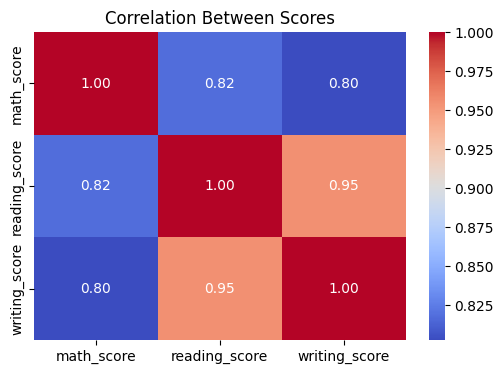

In [33]:
# Evaluating the correlation between the scores 
plt.figure(figsize=(6,4))
sns.heatmap(df[score_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Scores')
plt.show()

# 7. Key Findings (Markdown Example)

Key Insights:
- Female students tend to perform better in reading and writing.
- Male students slightly outperform in math.
- Students with higher parental education levels generally score higher.
- Completing a test preparation course boosts performance significantly.
- Standard lunch students score better, possibly reflecting socioeconomic factors.


# 8. Conclusion

Conclusion:
- This EDA highlights how preparation and socioeconomic variables shape academic outcomes.
- Future work could include building predictive models to estimate performance based on these features.
